# MNIST Digits Image Classifier


### To-Do List
1. Prepare Data
2. Visualize Data
3. Find Best Model
4. Hyper Parameter Tuning
5. Dabble with Unsurpervised Learning
6. Study PCA Curves
7. 






### Preparing Data

Firstly, I will verify how the data is initially and prepare it for modeling.

#####To-Do
1. Study the data, verifying how many instances there are and if they are shuffled.
2. Separate them into training and testing

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml



# Preparing the data
---

We will first download the data, then augment it, then split it.

In [62]:
mnist_dataset = fetch_openml('mnist_784', version=1)
mnist_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [63]:
X = mnist_dataset['data']
y = mnist_dataset['target']


In [64]:
y[:15]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1'], dtype=object)

In [65]:
y.shape

(70000,)

We will be augmenting the images by shifting and rotating randomly the images, creating 5x more images to reduce overfitting.

In [ ]:

def dataAugmentationRange(X,height_shift=2, width_shift=2, rotation_range=30, augs_per_image=5, shuffle=False):

    images = []

    for im in X:
        images.append(im)
        for i in range(augs_per_image):
            shift_values = [np.random.uniform(-height_shift,height_shift),np.random.uniform                (-width_shift,width_shift) ]
            angle = np.random.uniform(-rotation_range,rotation_range)

            img = shift(im.reshape(28,28),shift_values, cval=0.0,order=1)
            img = rotate(img, angle,reshape=False, cval=0.0,order=1).ravel()
            images.append(img)

    return np.array(images)

They are distributed in a uniform manner, so although this dataset is large enough to not bother with shuffling and stratifying, it isnt a problem with sklearn.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [41]:
np.unique(y_train, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5177, 5908, 5242, 5356, 5118, 4735, 5157, 5470, 5119, 5218],
       dtype=int64))

We can see that the dataset is balanced, so data preparation phase is complete. However, once we statr using grid search, we will be using cross validation instead of spliting the data.

# Visualizing the data
---

1. Use matplotlibs imshow to plot a 4x4 grid of digits with their respective target

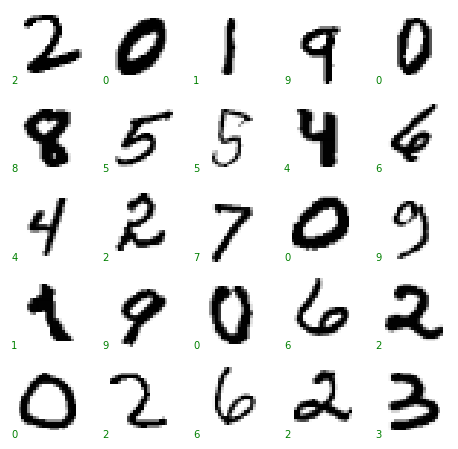

In [70]:
def showGrid(X, y, grid_size=(5,5)):
    fig, axs = plt.subplots(*grid_size, figsize=(8,8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw={'hspace':0.1,'wspace':0.1})
    
    for i,ax in enumerate(axs.flat):
        
        ax.imshow(X[i].reshape(28,28), cmap='binary', interpolation="nearest")
        ax.text(0.05, 0.05,str(y[i]), transform=ax.transAxes,
        color="green")

showGrid(X_train, y_train)

# Finding the Best Model
---

Now we will find the best model for the problem. 

#### Models

1. Logistic Regression Classifier
2. KNN
3. SGDC
4. SVC
5. Decision Tree Classifier
6. Random Forest Classifier
7. XGDBoost
8. GaussianNB

We will also test different scaling methods (No Scaling, MinMaxScaling, Standard Scalar), with the exception of the Tree models, since they don't require that.




In [60]:
#estimator imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#image augmentation
from scipy.ndimage.interpolation import shift
from scipy.ndimage.interpolation import rotate



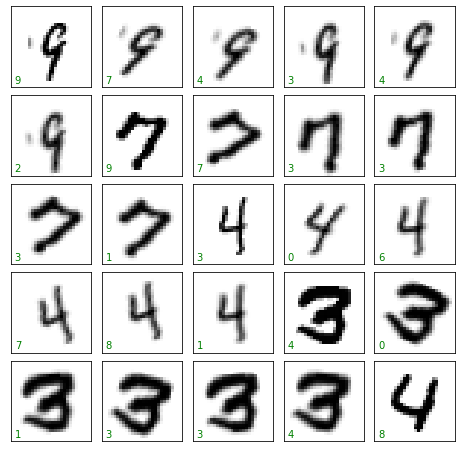

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

ValueError: cannot reshape array of size 784 into shape (8,8)

In [16]:
X_train[0].reshape(8,8).shape

(8, 8)